In [2]:
# type: ignore

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from seaborn import load_dataset

In [3]:
penguins = load_dataset("penguins")

penguins = penguins.dropna() #remove rows with null values

X = penguins[['bill_length_mm']]
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
print('Train size:', X_train.shape[0], ', test size:', X_test.shape[0])


Train size: 266 , test size: 67


In [4]:
model = KNeighborsClassifier(n_neighbors = 1, p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 62.69 %


In [5]:
model = KNeighborsClassifier(n_neighbors = 7, p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 7NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 7NN with major voting: 67.16 %


In [6]:
model = KNeighborsClassifier(n_neighbors = 40, p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 40NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 40NN with major voting: 82.09 %


Text(0, 0.5, 'accuracy')

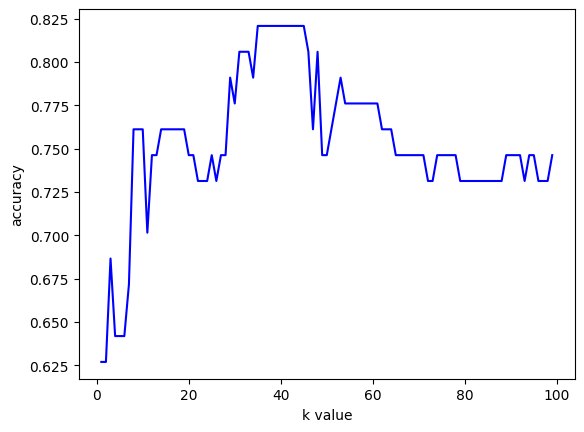

In [7]:
accuracy = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.plot(range(1,100), accuracy, color = 'blue')
plt.xlabel('k value')
plt.ylabel('accuracy')